### Imports

In [12]:
%load_ext autoreload
%autoreload 2

from data_management import data_loading, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading

In [2]:
manip_category = 'pump_and_dump'
energy_threshold = 0.75
use_cone = True

manip_features = data_loading(manip_category, energy_threshold, use_cone)

### Color Plots

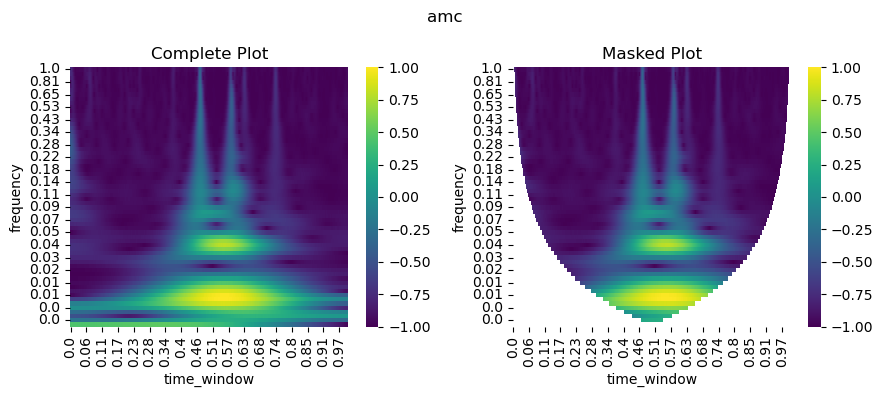

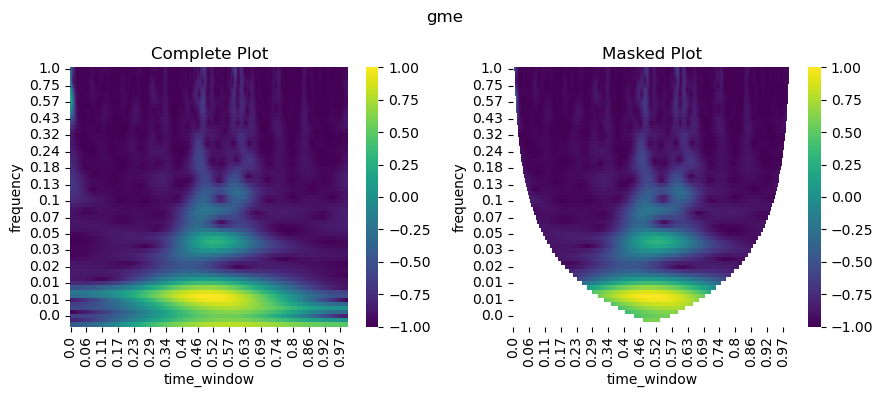

In [4]:
for stock_name, stock_dict in manip_features.items():
    color_plot(stock_dict, stock_name)

### 3D Visualizations

In [8]:
stock_name = 'gme'
plot_against = 'frequency'
hue_var = 'target'

plot3d_dataset(manip_features[stock_name]['features'], stock_name, plot_against, hue_var)

### Split data with random sampling

In [14]:
X_train_all, y_train_label, X_val_all, y_val_label, X_test_all, y_test_label = joint_random_sampling(manip_features, 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, :4]
X_val = X_val_all[:, :4]
X_test = X_test_all[:, :4]

# Target filtering
y_train = X_train_all[:, 4]
y_val = X_val_all[:, 4]
y_test = X_test_all[:, 4]

### Target Distribution Visualization 

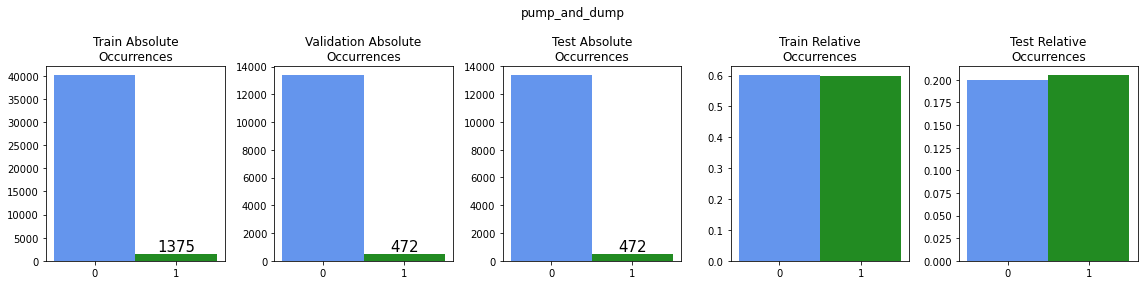

In [15]:
plot_target_classes(y_train_label, y_val_label, y_test_label, manip_category)